# **Heart Diesase Predictive Model**


## Setting Up & Data Filter

### Importing Packages and Data

In [45]:
import os
from google.colab import drive

import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

data=pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv') ##loading in the data set



In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Filtering the data (Null Value Checking & Duplication)

In [ ]:
data.isnull().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

No Null Values Identified and Duplicates Removed

## Data Exploration

### Making a Heat Map

Further the value from 0 the more correlation it has either inversely or directly

<Axes: >

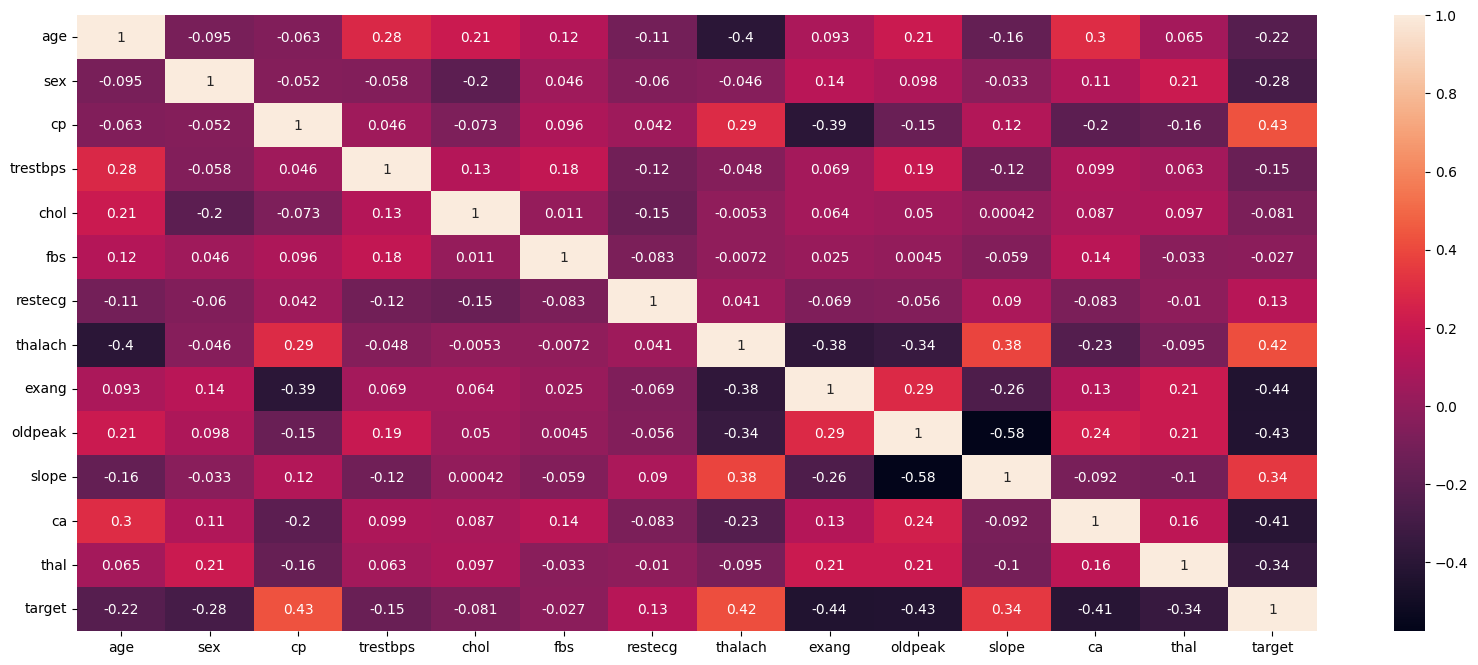

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

### Bi-Variable Data Analysis

In [ ]:
data.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125000,0.572917,151.12500,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,130.912621,239.601942,0.160194,0.504854,148.84466,0.373786,1.120874,1.383495,0.796117,2.402913,0.446602


<Axes: xlabel='age'>

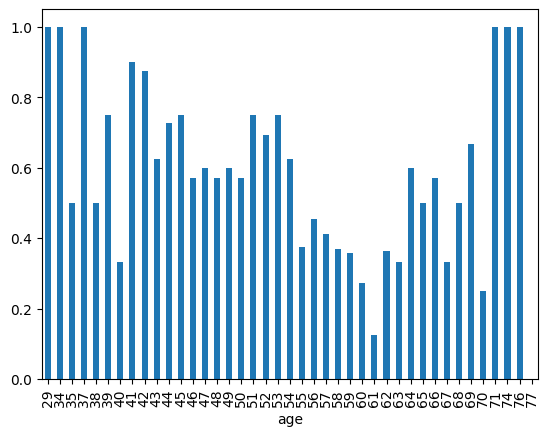

In [ ]:
data.groupby('age')['target'].mean().plot(kind='bar')

<Axes: xlabel='sex'>

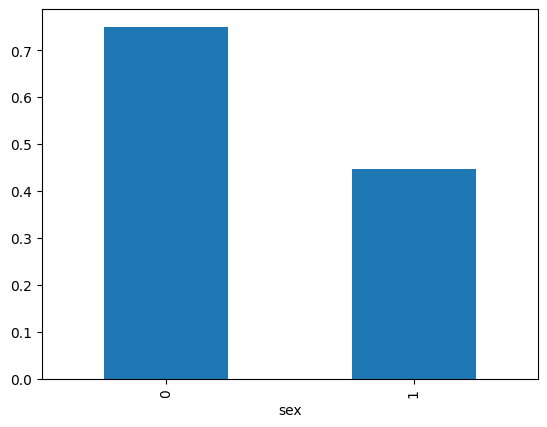

In [ ]:
data.groupby('sex')['target'].mean().plot(kind='bar')

<Axes: xlabel='age', ylabel='thalach'>

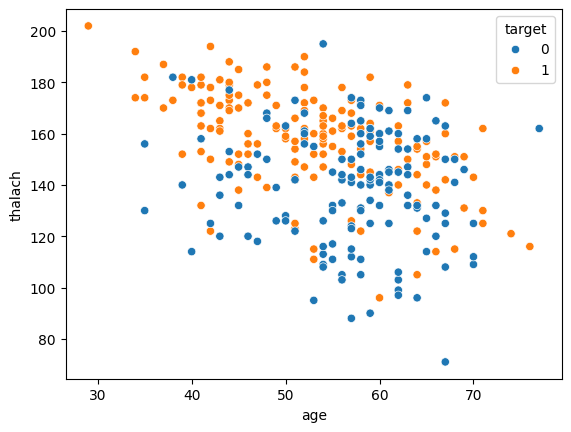

In [ ]:
sns.scatterplot(data=data, y='thalach',x='age', hue='target')

<Axes: xlabel='age', ylabel='thalach'>

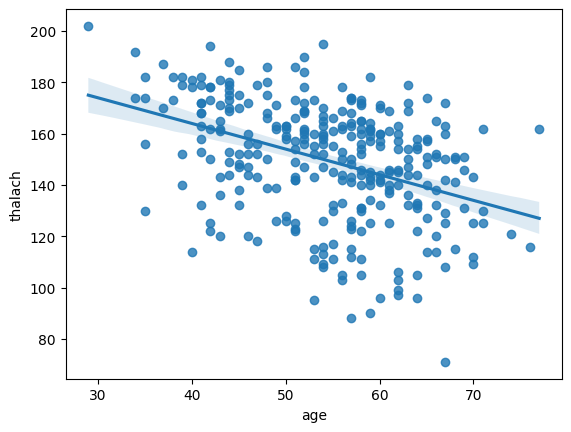

In [ ]:
sns.regplot(data=data, y='thalach',x='age')

<Axes: xlabel='age', ylabel='trestbps'>

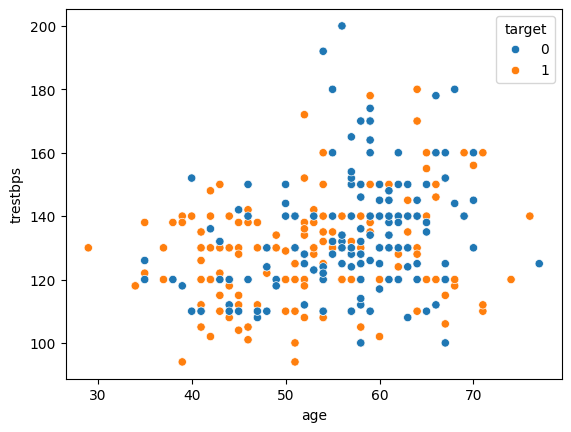

In [ ]:
sns.scatterplot(data=data, y='trestbps',x='age', hue='target')

<Axes: xlabel='age', ylabel='trestbps'>

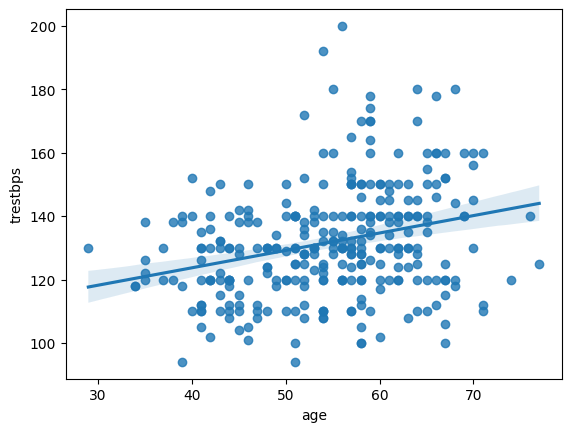

In [ ]:
sns.regplot(data=data, y='trestbps',x='age')

<Axes: xlabel='age', ylabel='chol'>

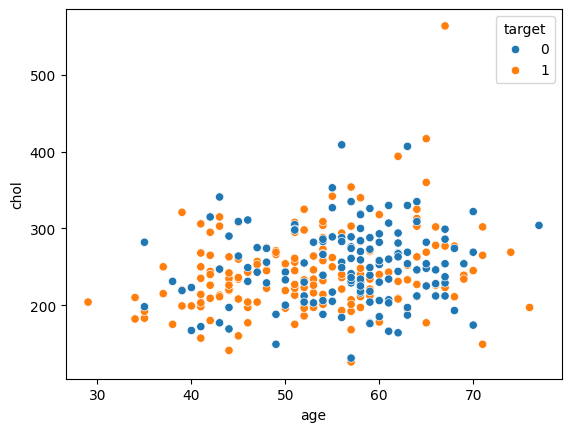

In [ ]:
sns.scatterplot(data=data, y='chol',x='age', hue='target')

<Axes: xlabel='age', ylabel='chol'>

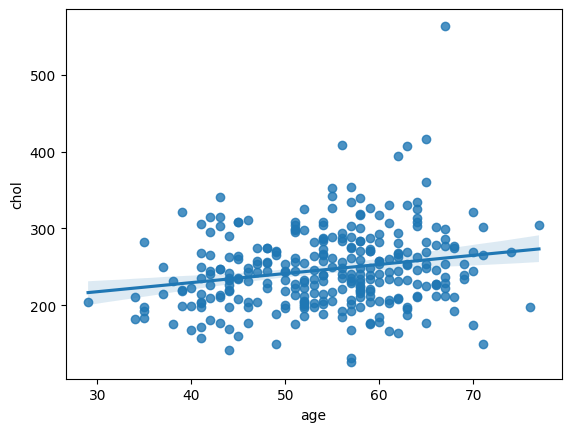

In [ ]:
sns.regplot(data=data, y='chol',x='age')

<Axes: xlabel='thalach', ylabel='trestbps'>

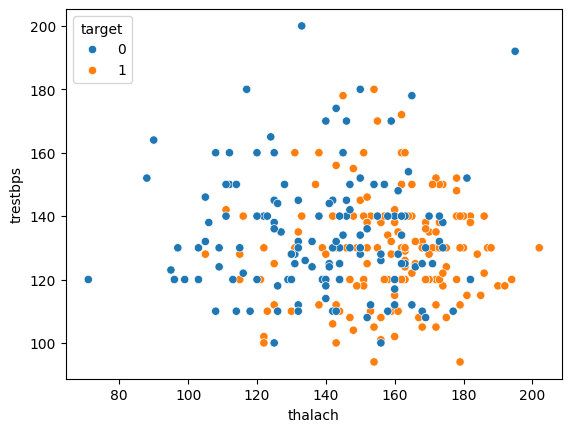

In [ ]:
sns.scatterplot(data=data, y='trestbps',x='thalach', hue='target')

<Axes: xlabel='thalach', ylabel='trestbps'>

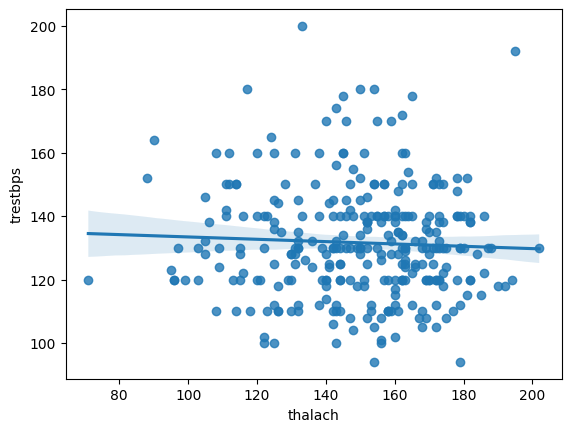

In [ ]:
sns.regplot(data=data, y='trestbps',x='thalach')

<Axes: xlabel='thalach', ylabel='chol'>

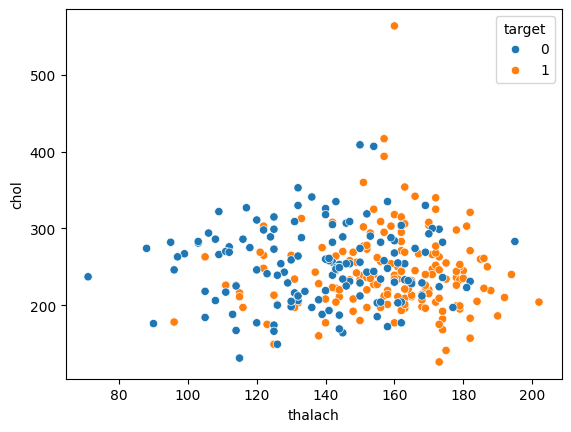

In [ ]:
sns.scatterplot(data=data, y='chol',x='thalach', hue='target')

<Axes: xlabel='thalach', ylabel='chol'>

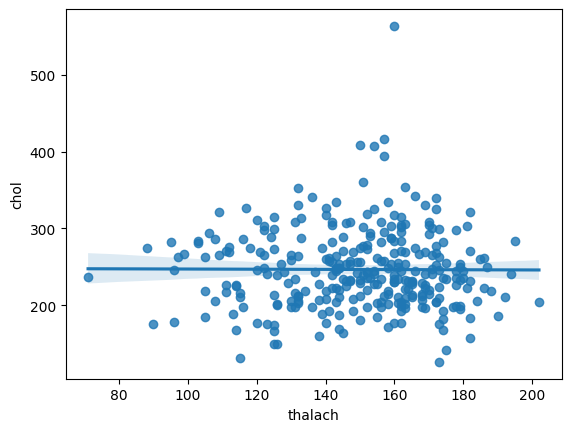

In [ ]:
sns.regplot(data=data, y='chol',x='thalach')

<Axes: xlabel='trestbps', ylabel='chol'>

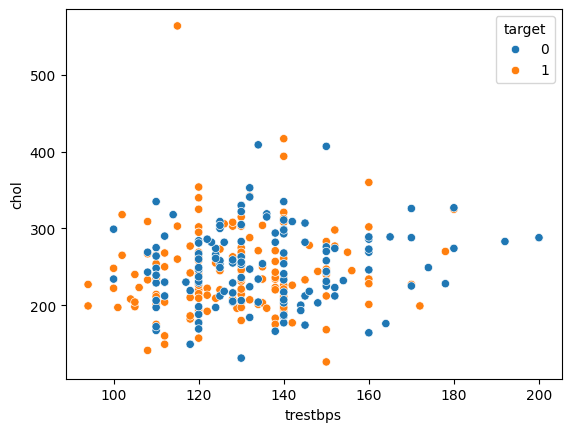

In [ ]:
sns.scatterplot(data=data, y='chol',x='trestbps', hue='target')

<Axes: xlabel='trestbps', ylabel='chol'>

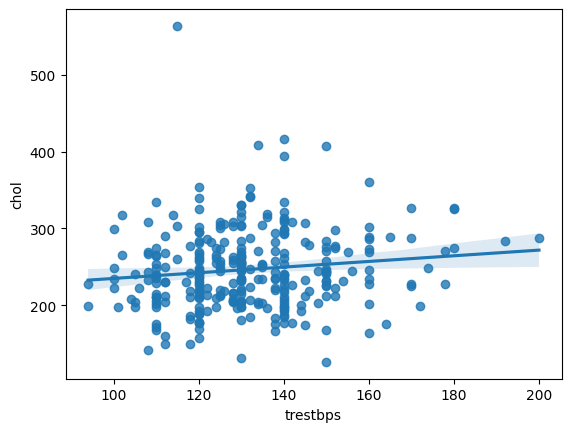

In [ ]:
sns.regplot(data=data, y='chol',x='trestbps')

### Comparative Bi-Variable Analysis

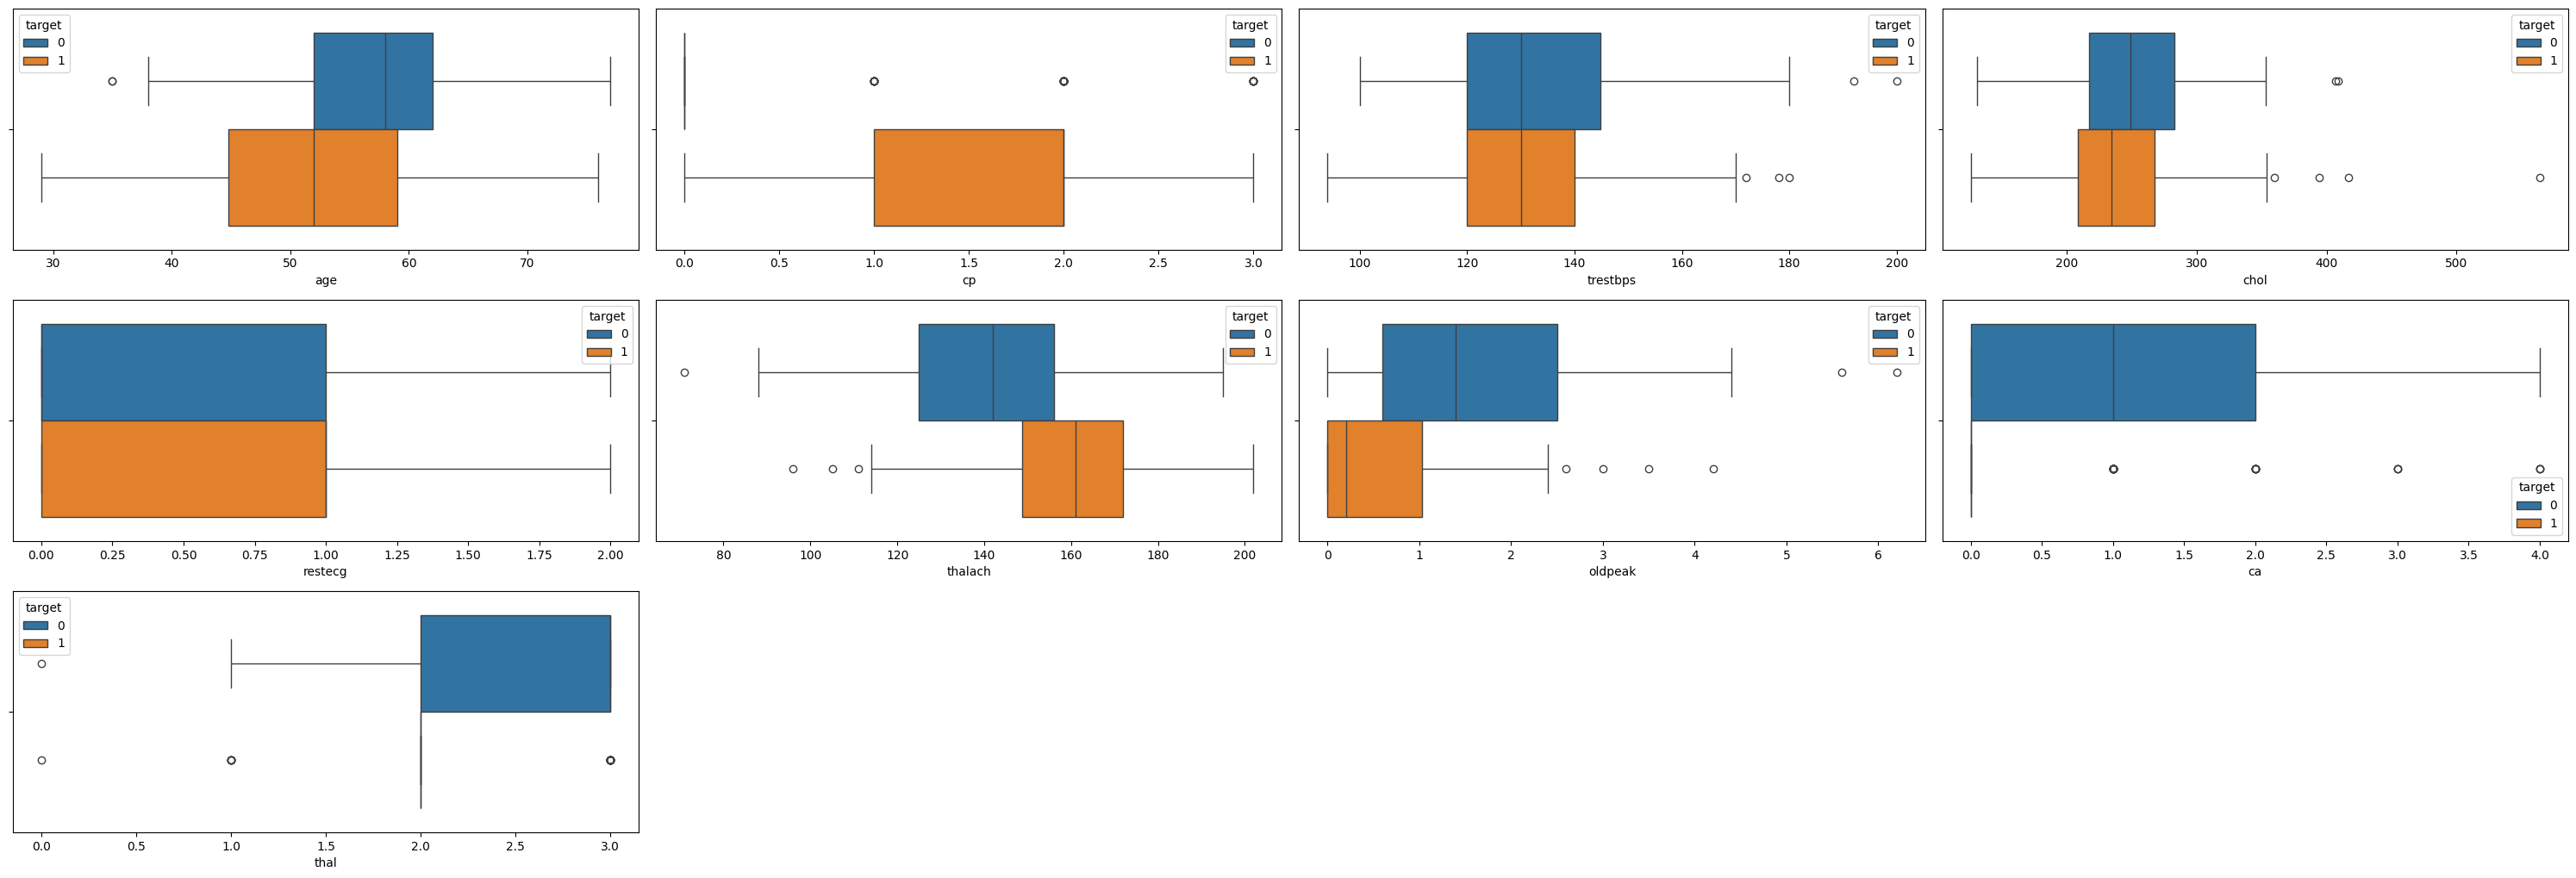

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(data.columns.drop(['sex','exang','target','fbs','slope'])):
  plt.subplot(6,4,i[0]+1)
  sns.boxplot(x=i[1], data=data,hue='target')
plt.tight_layout()

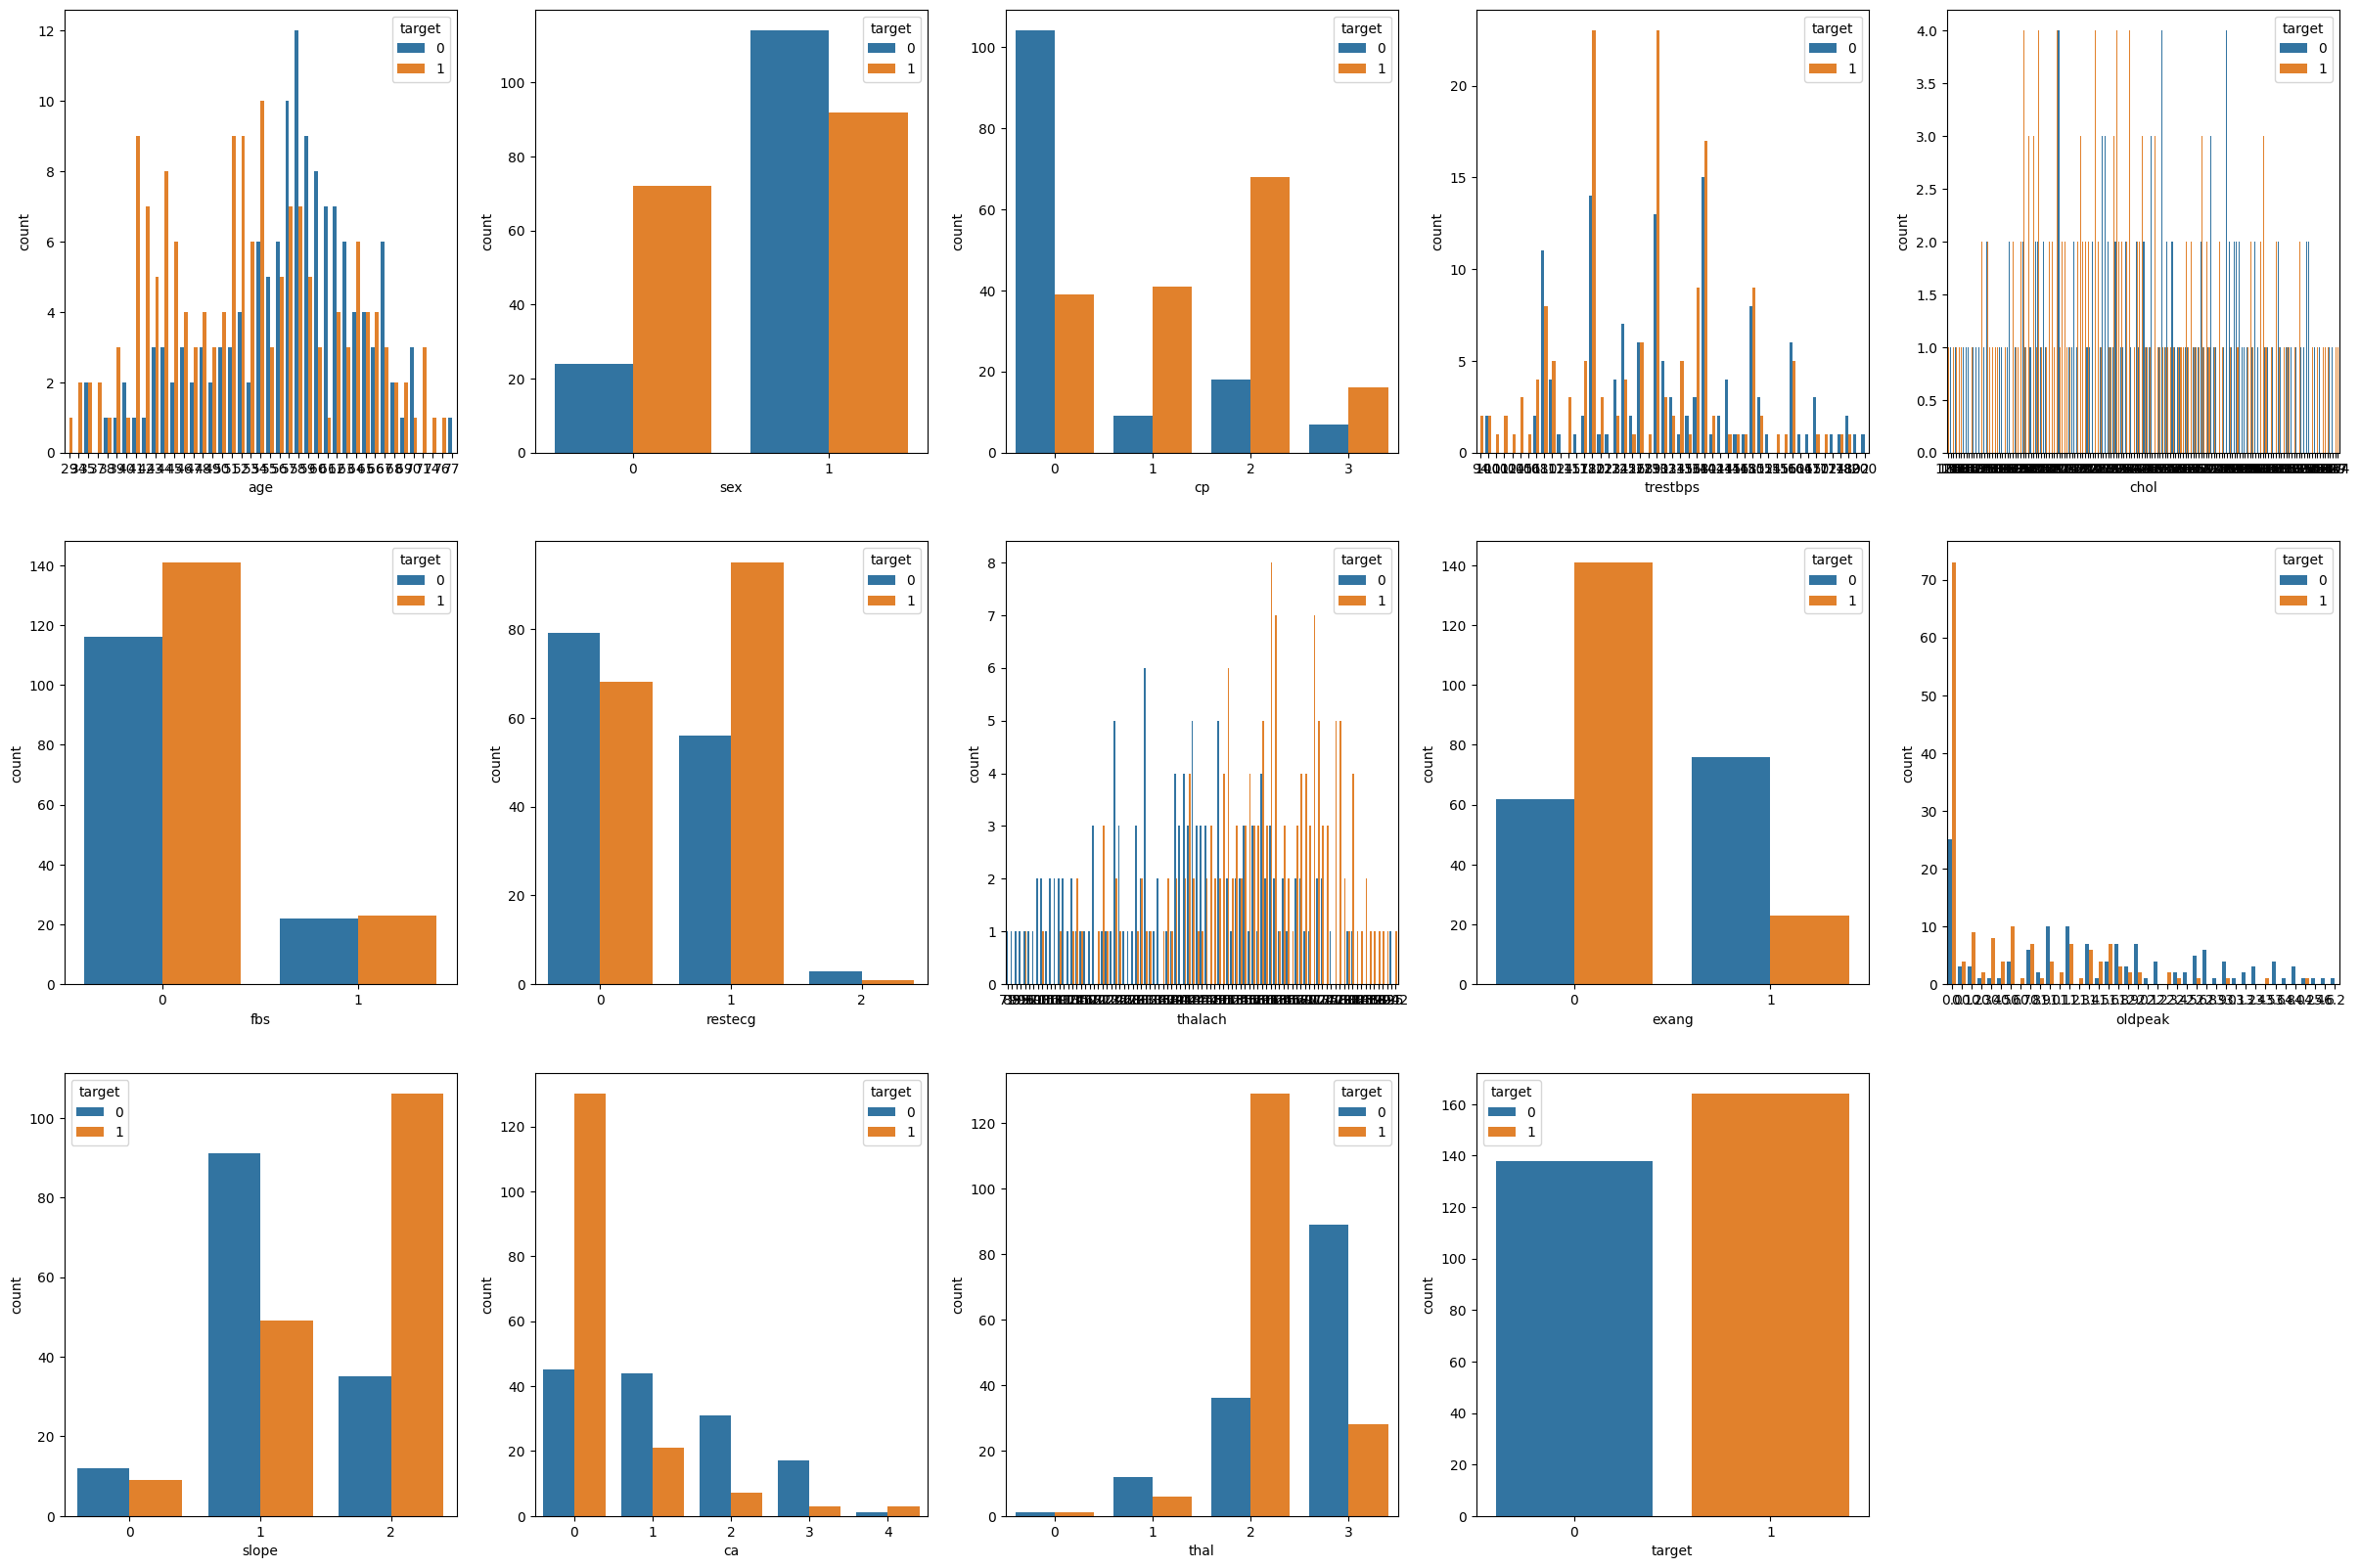

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(data.columns):
  plt.subplot(3,5,i[0]+1)
  sns.countplot(x=i[1], hue='target', data=data)

<Axes: title={'center': 'Target Correlation'}>

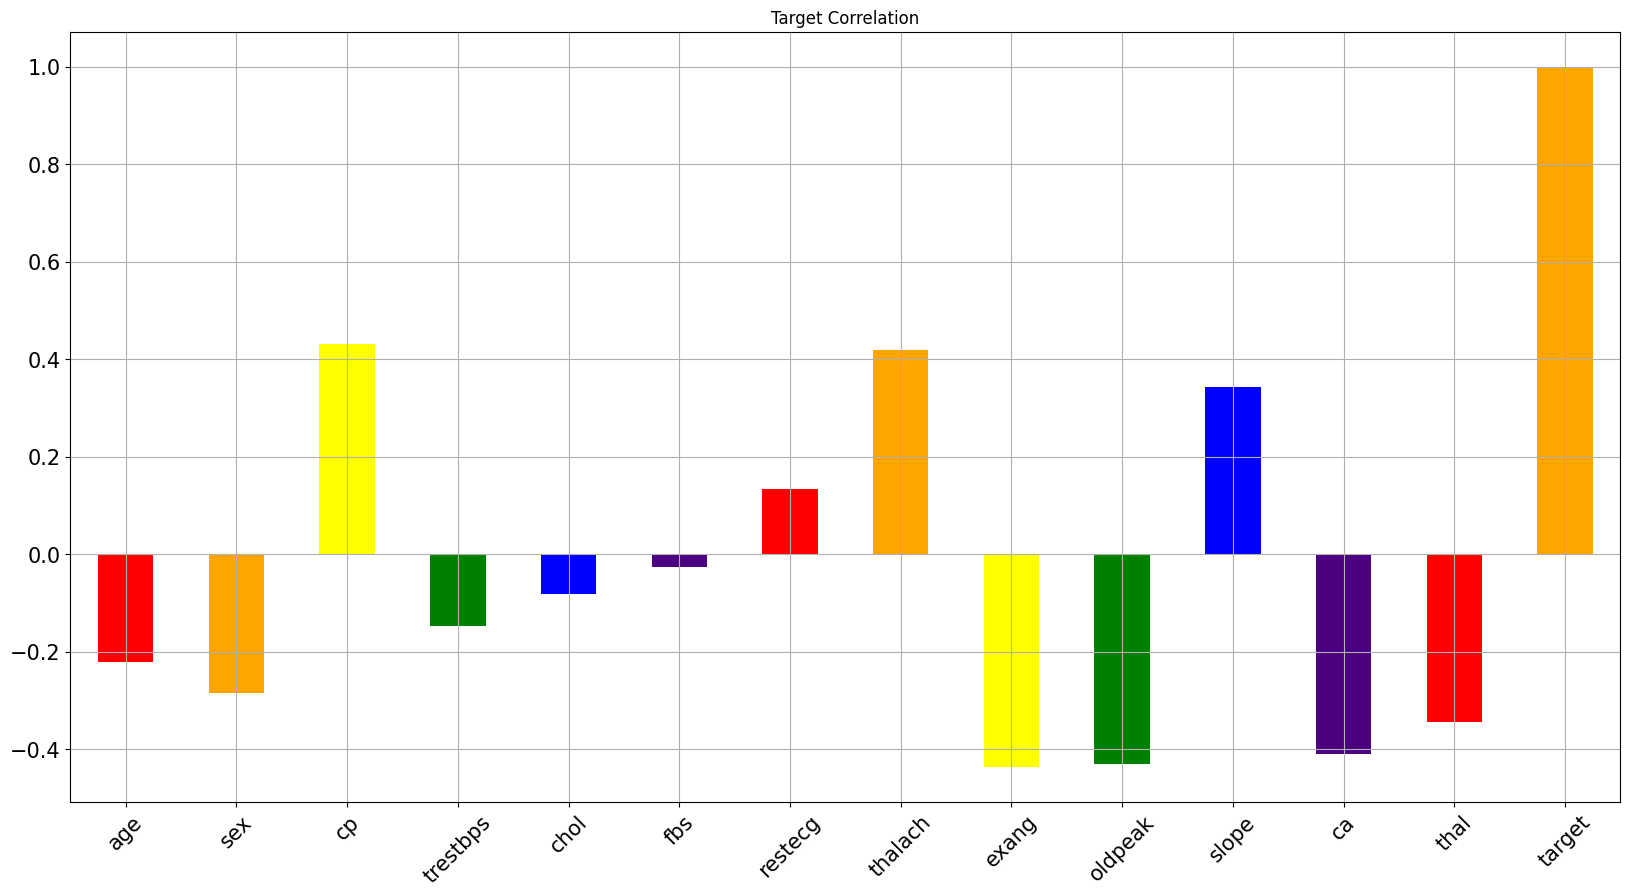

In [ ]:
data_x=data
c=['red','orange','yellow','green','blue','indigo']
data_x.corrwith(data['target']).plot.bar(figsize=(20,10),fontsize=15,title='Target Correlation',rot=45,grid=True,color=c)

##ML Model

### Finding Target Value Imbalance

In [ ]:
data['target'].value_counts(normalize=True)

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64

<Axes: ylabel='count'>

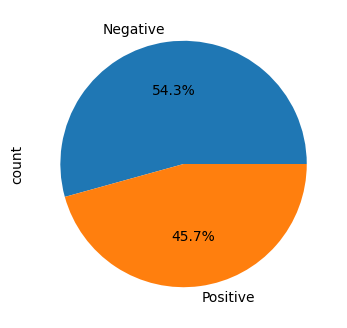

In [ ]:
plt.figure(figsize=(7,4))
data['target'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Negative','Positive'])

### Splitting of Data


In [ ]:
x=data.drop(['target','age','sex'],axis=1)
x.shape

(302, 11)

In [ ]:
y=data['target']
y.shape

(302,)

### Synthetic Minority Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

os=SMOTE(random_state=0)
x_os,y_os = os.fit_resample(x,y)

x_os.shape, y_os.shape

((328, 11), (328,))

Gives all test cases equal probability to have a more accurate sample 0.5 heart disease and 0.5 no disease

In [ ]:
y_os.value_counts(normalize=True)

target
1    0.5
0    0.5
Name: proportion, dtype: float64

Below we are splitting data into 70% training model, 30% testing model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_os, y_os, test_size=0.3,random_state=0)

Scaling the model

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler().fit(x_train)
x_train_sc = sc_train.transform(x_train)
np.set_printoptions(precision=3)
print(x_train_sc[0:5,:])

[[-0.847 -0.103  1.592  2.626 -0.923 -0.649  1.352  0.735  1.063  2.432
   1.12 ]
 [ 1.093 -0.103 -0.905  2.626 -0.923  0.202 -0.74   0.175 -2.44  -0.72
  -0.463]
 [ 0.123 -0.449  0.297 -0.381  0.981 -0.266 -0.74  -0.666  1.063 -0.72
   1.12 ]
 [-0.847  0.185 -0.21  -0.381  0.981  0.585 -0.74  -0.479 -0.688 -0.72
   1.12 ]
 [ 1.093  0.473 -0.191 -0.381 -0.923  1.394 -0.74  -0.946  1.063 -0.72
  -0.463]]


### Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(x_train_sc,y_train)

LogisticRegression(solver='liblinear')

### Testing the Model

In [ ]:
sc_test = StandardScaler().fit(x_test)
x_test_sc = sc_test.transform(x_test)
results= model.score(x_test_sc,y_test)
results*100

81.81818181818183

This model gave us an accuracy of 81.81% in test data

In [ ]:
results= model.score(x_train_sc,y_train)
results*100

82.96943231441048

This model gave us an accuracy of 82.96% in train data

### Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

KFold & LogisticRegression

In [ ]:
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
lr_2= LogisticRegression(solver='liblinear')

In [ ]:
results = cross_val_score(lr_2, x_train_sc, y_train, cv=kfold)
results

array([0.826, 0.696, 0.783, 0.87 , 0.783, 0.783, 0.739, 0.826, 0.826,
       0.818])

In [ ]:
results.mean()*100.0,results.std()*100.0

(79.48616600790514, 4.73797485144755)

Other meathods of cross validation include:-

1.   Logistic Regression w/ CV & Log_loss Metric
2.   Logistic Regression w/ AUC Metric (Less accurate)
3.   Confusion M


